# Exploratory analysis

## Library imports

In [12]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## Data extraction

In [13]:
data_polls_train: pd.DataFrame = pd.read_csv("../data/polls_by_election_train.csv")

Saving training set of data, it was sampled from entire data set of polls we have obtained that is in polls_data.csv. We have previously filtered only parties that have at least once received 1.5% in the polls a year before the election.
As well for each party we have combined data from the election results and previous election results to establish, whether before this election cycle a given party was in parliament and whether it was in opposition or coalition. 

In [8]:
data_polls_train.head() #sneak_peak into the data

,political_party,election_date,election_result,elected_to_parliament,in_coalition_before,in_opposition_before,1,2,3,4,5,6,7,8,9,10,11,12
0,olano,2023-09-30,8.89,1,1,0,8.2,6.4,6.2,6.0,5.6,4.3,6.4,7.4,7.0,7.2,7.8,8.0
1,smk,2020-02-29,0.00,0,0,0,0.0,0.0,0.0,3.5,3.2,3.3,3.5,3.7,3.6,3.0,3.1,3.3
2,smer_sd,2016-03-05,28.28,1,1,0,34.6,38.4,39.0,39.1,37.7,34.6,35.3,33.2,37.4,35.5,34.2,34.0
3,sdku_ds,2016-03-05,0.26,0,0,1,1.0,2.5,3.0,2.8,2.2,2.2,2.4,2.3,3.2,2.8,2.1,4.2
4,sss,2012-03-10,1.22,0,0,0,3.5,1.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
print(data_polls_train.describe())

       election_result  elected_to_parliament  in_coalition_before  \
count         50.00000              50.000000            50.000000   
mean           6.26560               0.480000             0.160000   
std            6.64469               0.504672             0.370328   
min            0.00000               0.000000             0.000000   
25%            0.83250               0.000000             0.000000   
50%            5.27000               0.000000             0.000000   
75%            8.19000               1.000000             0.000000   
max           28.28000               1.000000             1.000000   

       in_opposition_before          1         2          3          4  \
count             50.000000  50.000000  50.00000  50.000000  50.000000   
mean               0.240000   6.140000   5.98400   5.970000   6.078000   
std                0.431419   6.277787   6.66267   6.742169   6.735325   
min                0.000000   0.000000   0.00000   0.000000   0.000000   

In [19]:
data_last_election = data_polls_train[data_polls_train["election_date"] == "2023-09-30"]
data_last_election

,political_party,election_date,election_result,elected_to_parliament,in_coalition_before,in_opposition_before,1,2,3,4,5,6,7,8,9,10,11,12
0,olano,2023-09-30,8.89,1,1,0,8.2,6.4,6.2,6.0,5.6,4.3,6.4,7.4,7.0,7.2,7.8,8.0
6,sas,2023-09-30,6.32,1,1,0,5.8,6.1,5.2,5.0,5.2,5.1,5.3,5.6,8.1,8.2,12.0,11.1
8,hlas_sd,2023-09-30,14.70,1,0,1,13.7,14.2,16.0,16.3,17.0,17.1,20.8,19.0,19.4,20.3,18.5,17.8
11,madarske_forum,2023-09-30,0.11,0,0,0,0.0,0.0,0.0,0.0,1.7,1.5,1.9,1.1,1.5,1.7,1.2,0.7
15,demokrati,2023-09-30,2.93,0,0,0,4.0,3.1,3.8,3.6,3.6,5.0,0.0,0.0,0.0,0.0,0.0,0.0
24,republika,2023-09-30,4.75,0,0,0,7.7,8.8,8.7,9.0,9.8,9.6,8.5,6.9,7.2,7.8,7.0,7.8
30,progresivne_slovensko,2023-09-30,17.96,1,0,0,16.6,15.0,14.3,13.5,13.1,12.1,11.0,12.8,10.2,9.6,8.1,8.3
31,sns,2023-09-30,5.62,1,0,0,6.4,5.3,5.1,5.5,4.0,3.4,3.6,3.4,3.8,3.9,3.8,3.9
35,modri,2023-09-30,0.00,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
39,smer_sd,2023-09-30,22.94,1,0,1,18.0,20.0,18.1,19.0,17.7,17.6,14.6,16.6,15.6,15.3,15.6,16.3


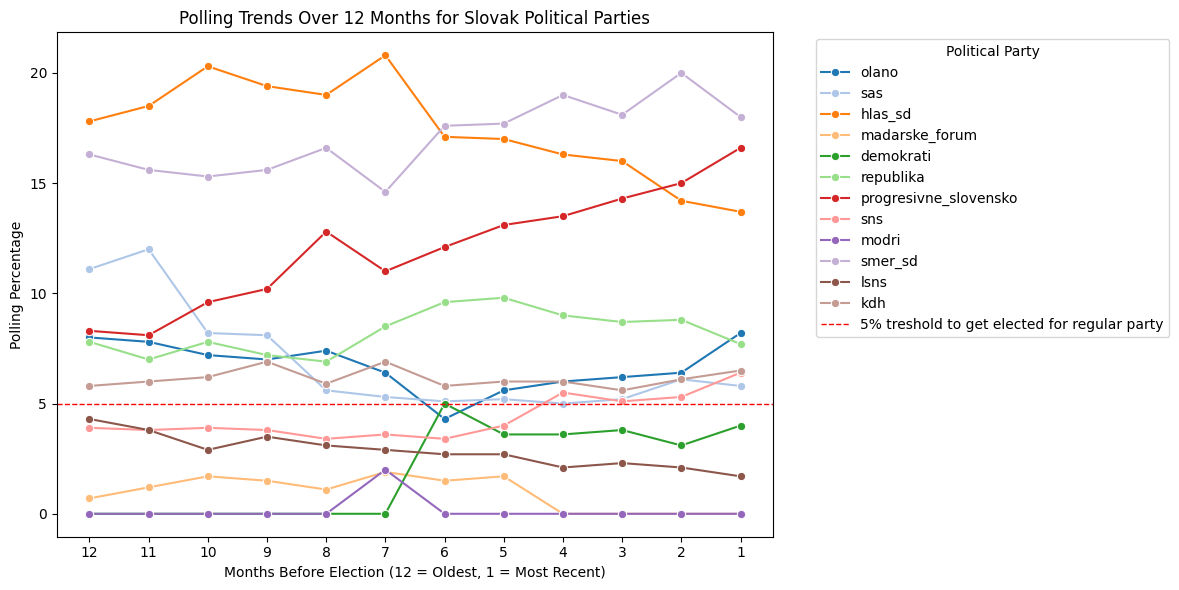

In [27]:

# Melt the monthly polling columns (1, 2, ..., 12) into a long format
polling_columns = [str(i) for i in range(1, 13)]
polls_long = data_last_election.melt(
    id_vars=['political_party', 'election_date', 'election_result', 'elected_to_parliament', 
             'in_coalition_before', 'in_opposition_before'],
    value_vars=polling_columns,
    var_name='month',
    value_name='poll_percentage'
)

polls_long['month'] = polls_long['month'].astype(int)

# Reverse the month order on the x-axis
polls_long['month'] = 13 - polls_long['month']  # Reverse month order (1 becomes 12, 12 becomes 1)

# Plot polling trends for each political party
plt.figure(figsize=(12, 6))
sns.lineplot(data=polls_long, x='month', y='poll_percentage', hue='political_party', marker='o',  palette='tab20')

# Customize the plot
plt.title('Polling Trends Over 12 Months for Slovak Political Parties')
plt.axhline(y=5, color='red', linestyle='--', linewidth=1, label='5% treshold to get elected for regular party')
plt.xlabel('Months Before Election (12 = Oldest, 1 = Most Recent)')
plt.ylabel('Polling Percentage')
plt.legend(title='Political Party', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(ticks=range(1, 13), labels=range(12, 0, -1))  # Reverse x-axis labels
plt.tight_layout()

# Show the plot
plt.show()


In [38]:
polls_long.head()

,political_party,election_date,election_result,elected_to_parliament,in_coalition_before,in_opposition_before,month,poll_percentage
0,olano,2023-09-30,8.89,1,1,0,12,8.2
1,sas,2023-09-30,6.32,1,1,0,12,5.8
2,hlas_sd,2023-09-30,14.70,1,0,1,12,13.7
3,madarske_forum,2023-09-30,0.11,0,0,0,12,0.0
4,demokrati,2023-09-30,2.93,0,0,0,12,4.0


           political_party  poll_percentage  election_result
132                  olano              8.0             8.89
133                    sas             11.1             6.32
134                hlas_sd             17.8            14.70
135         madarske_forum              0.7             0.11
136              demokrati              0.0             2.93
137              republika              7.8             4.75
138  progresivne_slovensko              8.3            17.96
139                    sns              3.9             5.62
140                  modri              0.0             0.00
141                smer_sd             16.3            22.94
142                   lsns              4.3             0.84
143                    kdh              5.8             6.82


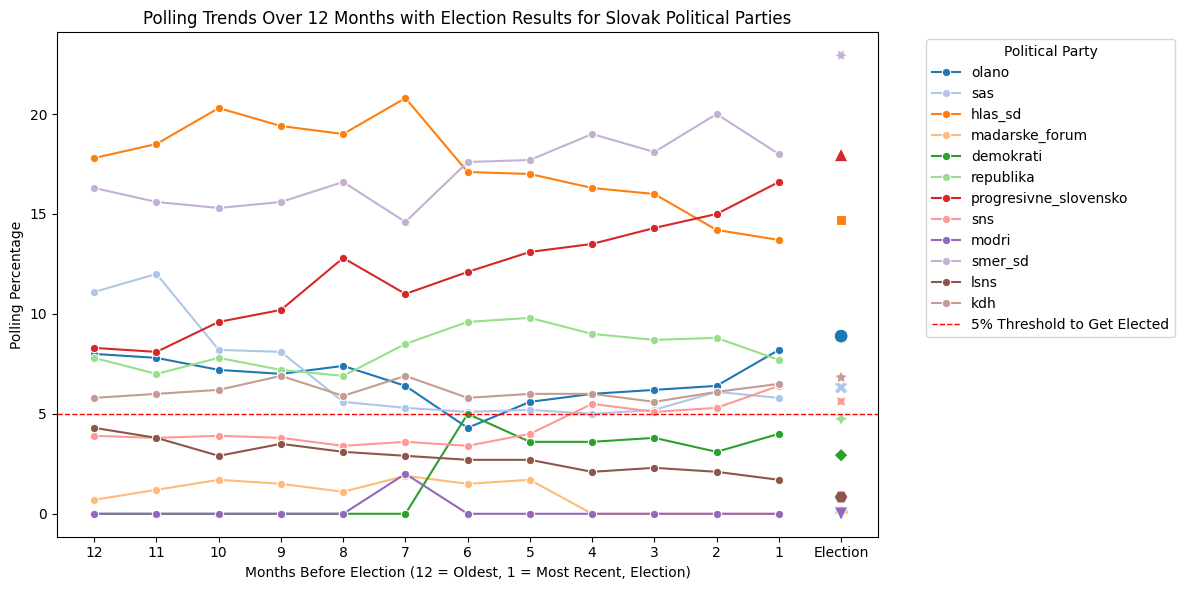

In [57]:
# Prepare the data for the 1-month poll and election results
poll_and_results = polls_long[polls_long['month'] == 1][['political_party', 'poll_percentage', "election_result"]]
print(poll_and_results)
palette = sns.color_palette('tab20', n_colors=poll_and_results["political_party"].nunique())
plt.figure(figsize=(12, 6))
sns.lineplot(data=polls_long, x='month', y='poll_percentage', hue='political_party', marker='o', palette=palette)
'''
# Add lines connecting 1-month poll to election result
for _, row in poll_and_results.iterrows():
    plt.plot(
        [12, 13],  # x-coordinates: 1 month and election result (x=13)
        [row['poll_percentage'], row['election_result']],  # y-coordinates: poll and election result
        color='gray', linestyle='--', linewidth=1
    )'''
sns.scatterplot(data=poll_and_results, x=[13] * len(poll_and_results), y='election_result', 
                hue='political_party', style='political_party', s=100, palette=palette, legend=False)
# Customize the plot
plt.title('Polling Trends Over 12 Months with Election Results for Slovak Political Parties')
plt.axhline(y=5, color='red', linestyle='--', linewidth=1, label='5% Threshold to Get Elected')
plt.xlabel('Months Before Election (12 = Oldest, 1 = Most Recent, Election)')
plt.ylabel('Polling Percentage')
plt.legend(title='Political Party', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(ticks=list(range(1, 13)) + [13], labels=list(range(12, 0, -1)) + ['Election'])  # Add "Election" at x=13
plt.tight_layout()

# Show the plot
plt.show()